In [24]:
%matplotlib inline
from astropy.io import ascii
import matplotlib.pyplot as plt
import numpy as np
from astropy.time import Time
from astropy.io import fits
from matplotlib import rc
import matplotlib.patches as mpatches
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

#ztf
model = fits.getdata('ZTF_NGC 659.fits', 1, ignore_missing_end=True)
period = 1.66349730
mjd = model['mjd']
time = Time(mjd, format = 'mjd')
mag = model['mag']
dmag = model['magerr']
filtercode = model['filtercode']
ph_fold = time.jd%period

In [31]:
#tess
tess = 'TESS_NGC 659.dat'
dtab = ascii.read(tess)
tbjd = dtab['TBJD']
t = Time(tbjd, format = 'mjd')
flux = dtab['bkgsubflux']
magnitude = - 2.5 * np.log10(flux)
#t_shift = t - 4767726 * period
t_shift = t.jd%period

model = ascii.read('C:/users/tehan/desktop/model.csv')

t = model['time']
mag = model['mag']
dmag = model['e_mag']
fit = model['fit']
#plt.xlim(2458470, 2458473)
#plt.plot(t,mag)
plt.plot(t,fit)

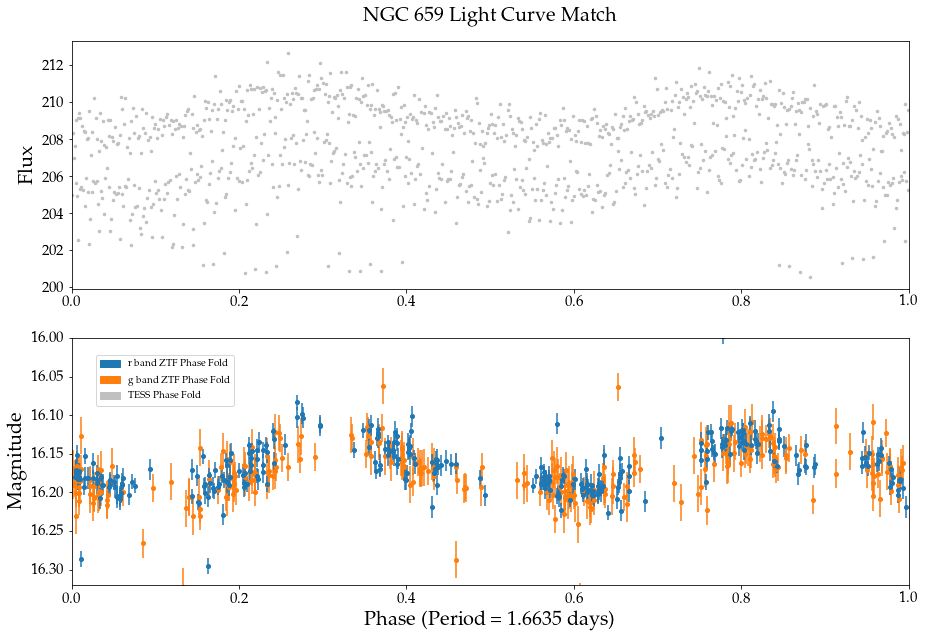

In [63]:
gband = np.where(filtercode == 'zg')
rband = np.where(filtercode == 'zr')

fig = plt.figure(figsize = (15,10))
ax1 = plt.subplot2grid((2, 1), (0, 0))
ax2 = plt.subplot2grid((2, 1), (1, 0))

ax1.plot(t_shift/ period, flux,  marker = '.', ms = 5, ls = '', c = 'silver')
ax1.set_xlim(0, 1)
ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.set_ylabel('Flux', fontsize = 20)
ax1.set_title('NGC 659 Light Curve Match', fontsize = 20, pad = 20)
ax2.errorbar(ph_fold[gband]/ period, mag[gband], dmag[gband], marker = '.', ms = 8, ls = '', c = 'C1')
ax2.errorbar(ph_fold[rband]/ period, mag[rband] + 0.54, dmag[rband], marker = '.', ms = 8, ls = '', c = 'C0')
ax2.set_xlim(0, 1)
ax2.tick_params(axis='both', which='major', labelsize=15)
ax2.set_xlabel('Phase (Period = %.4f days)' %period, fontsize = 20)
ax2.set_ylabel('Magnitude', fontsize = 20)
ax2.set_ylim(16.32, 16)
patch1 = mpatches.Patch(color='C0', label='r band ZTF Phase Fold')
patch2 = mpatches.Patch(color='C1', label='g band ZTF Phase Fold')
patch3 = mpatches.Patch(color='silver', label='TESS Phase Fold')
plt.legend(handles=[patch1, patch2, patch3], bbox_to_anchor=(0.2, 0.95))

plt.savefig('NGC 659.png')